# Problem Set 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import the salary dataset

In [2]:
df=pd.read_csv('SalaryData.csv')

In [3]:
df.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [4]:
df.tail()

,Education,Occupation,Salary
35,Bachelors,Exec-managerial,173935
36,Bachelors,Exec-managerial,212448
37,Bachelors,Exec-managerial,173664
38,Bachelors,Exec-managerial,212760
39,Doctorate,Exec-managerial,212781


In [5]:
df.shape

(40, 3)

There are 40 rows and 3 columns in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Education   40 non-null     object
 1   Occupation  40 non-null     object
 2   Salary      40 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


There are no null values in the data set and the data type of education and occupation is 'object' and  'salary' is int64.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,40.0,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


As we can infer from the above data, min salary is 50103.0, max salary is 260151.0 and the mean is 162186.875

In [11]:
df['Salary'].unique()

array([153197, 115945, 175935, 220754, 170769, 219420, 237920, 160540,
       180934, 248156, 247724, 249207, 235334, 248871, 257345, 160910,
       162494, 188729,  99185,  90135, 100135, 133696, 149909, 191712,
       167431, 260151,  50103,  50122,  52242,  75333,  77743,  83203,
        90456, 100678,  95469, 173935, 212448, 173664, 212760, 212781],
      dtype=int64)

In [12]:
df['Education'].unique()

array([' Doctorate', ' Bachelors', ' HS-grad'], dtype=object)

In [13]:
df['Occupation'].unique()

array([' Adm-clerical', ' Sales', ' Prof-specialty', ' Exec-managerial'],
      dtype=object)

As observed there are no bad or missing data in the dataset

## Problem 1A:

## 1.1 State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

Salary is hypothesized to depend on educational qualification and occupation.
Educational qualification is at three levels, High school graduate, Bachelor, and Doctorate.
Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial.

#### Hypothesis testing for educational qualification.

Ho: The mean salary is same across all categories of educational qualification.
Ha: The mean salary is not same across atleast one category of educational qualification.

#### Hypothesis testing for Occupation.

In [ ]:
Ho: The mean salary is same across all categories of Occupation.
Ha: The mean salary is not same across atleast one category of Occupation.

## 1.2 Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results

Importing the necessary functions from library

In [21]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance , anova_lm

#### Hypothesis testing for educational Qulaification.

Ho: The mean salary is same across all categories of educational qualification.
Ha: The mean salary is not same across atleast one category of educational qualification.

In [28]:
formula='Salary~Education'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Education,2.0,1.026955e+11,5.134773e+10,30.95628,1.257709e-08
Residual,37.0,6.137256e+10,1.658718e+09,NaN,NaN


In [52]:
print('As P value is less than 0.05, we reject the null hypothesis that the mean salary is same across all categories of educational qualification')

As P value is less than 0.05, we reject the null hypothesis that the mean salary is same across all categories of educational qualification


## 1.3 Perform one-way ANOVA for variable Occupation with respect to the variable ‘Salary’. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

#### Hypothesis testing for Occupation.

Ho: The mean salary is same across all categories of Occupation.
Ha: The mean salary is not same across atleast one category of Occupation.

In [31]:
formula='Salary~Occupation'
model=ols(formula,df).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
Occupation,3.0,1.125878e+10,3.752928e+09,0.884144,0.458508
Residual,36.0,1.528092e+11,4.244701e+09,NaN,NaN


In [53]:
print('As P value is more than 0.05, we fail to reject the null hypothesis that the mean salary is same across all categories of  Occupation')

As P value is more than 0.05, we fail to reject the null hypothesis that the mean salary is same across all categories of  Occupation


## 1.4 If the null hypothesis is rejected in either (1.2) or in (1.3), find out which class means are significantly different. Interpret the result.

As observed from the above analysis we confirm that the mean salary is not same across all categories of Education.
To find out which one of those categories have a different mean we perform Tukey's test.

In [4]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [17]:
compare=MultiComparison(df['Salary'],df['Education'])
result=compare.tukeyhsd()
print(result)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
  group1     group2     meandiff   p-adj     lower        upper    reject
-------------------------------------------------------------------------
 Bachelors  Doctorate   43274.0667 0.0146    7541.1439  79006.9894   True
 Bachelors    HS-grad  -90114.1556  0.001 -132035.1958 -48193.1153   True
 Doctorate    HS-grad -133388.2222  0.001 -174815.0876 -91961.3569   True
-------------------------------------------------------------------------


From the test result we observe that the P values of all the groups are lower than 0.05, hence it implies that the mean value of all the categories of Education are different.

## Problem 1B:

## 1.5 What is the interaction between the two treatments? Analyze the effects of one variable on the other (Education and Occupation) with the help of an interaction plot.

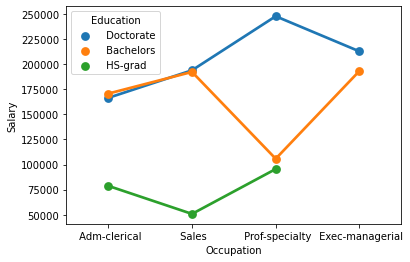

In [15]:
sns.pointplot(x='Occupation', y='Salary', data=df, hue='Education',ci=None);

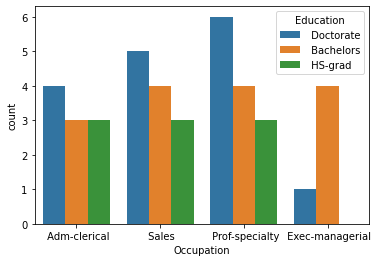

In [62]:
sns.countplot(data=df,x='Occupation',hue='Education');

From the interaction plot it is evident that there is a lot of interaction between Education and Occupation.


## 1.6 Perform a two-way ANOVA based on the Education and Occupation (along with their interaction Education*Occupation) with the variable ‘Salary’. State the null and alternative hypotheses and state your results. How will you interpret this result?

In [60]:
formula = 'Salary ~ C(Education) + C(Occupation) + C(Education):C(Occupation)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
(aov_table)

,df,sum_sq,mean_sq,F,PR(>F)
C(Education),2.0,1.026955e+11,5.134773e+10,72.211958,5.466264e-12
C(Occupation),3.0,5.519946e+09,1.839982e+09,2.587626,7.211580e-02
C(Education):C(Occupation),6.0,3.634909e+10,6.058182e+09,8.519815,2.232500e-05
Residual,29.0,2.062102e+10,7.110697e+08,NaN,NaN


**Amit:  Why converting Occupation and Education into Categorical fields, they are already in Category **

**Amit: You have mentioned that , "From the interaction plot, " where is this  interaction plot, **

## 1.7 Explain the business implications of performing ANOVA for this particular case study.

**Amit: Why you have written in above comment that "higher the education the more the earning."  When you are talking about combined affect, and there is no Huge interation between Education and Occupation, I found there is Slight interaction so "Yes" there is some affect of Education and Occupation as a combine on Salary for sure, but not Much, becuase interaction plot is connecting to each other , for **

Try following interaction chart,

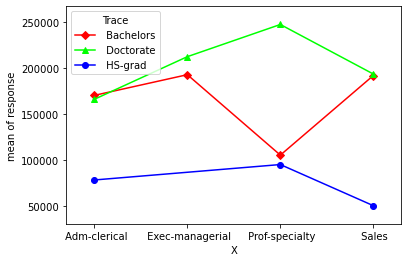

In [14]:
from statsmodels.graphics.factorplots import interaction_plot
interaction_plot(np.array(df['Occupation']),np.array(df['Education']),np.array(df['Salary']),markers=['D','^','o']);

# Problem Set 2:

In [63]:
df1=pd.read_csv('Education+-+Post+12th+Standard.csv')

In [64]:
df1.head()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [65]:
df1.tail()

,Names,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99
776,York College of Pennsylvania,2989,1855,691,28,63,2988,1726,4990,3560,500,1250,75,75,18.1,28,4509,99


In [66]:
df1.shape

(777, 18)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [69]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


In [70]:
df1.duplicated().sum()

0

## 2.1 Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. What insight do you draw from the EDA?

In [98]:
df_num = df1.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
len(lstnumericcolumns)

17

In [99]:
df_num.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [76]:
df_num.shape

(777, 17)

#### Univariate analysis

In [121]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df_num[column].describe(),end=' ')
    
    
    plt.figure(figsize=(12,5))
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.displot(df_num[column], kde=True, color='r',bins=nbins);
    plt.show()
    
    plt.figure(figsize=(6,3))
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df_num[column])
    plt.show()

Description of Apps
----------------------------------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64 Distribution of Apps
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

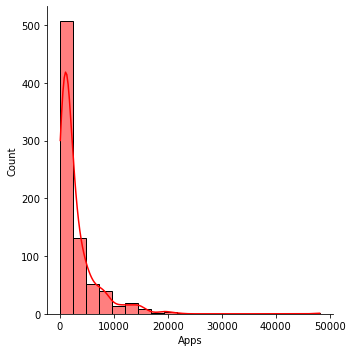

BoxPlot of Apps
----------------------------------------------------------------------------


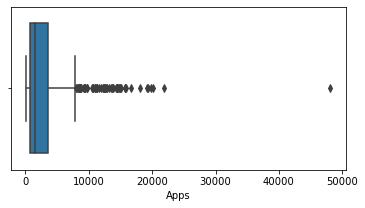

Description of Accept
----------------------------------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64 Distribution of Accept
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

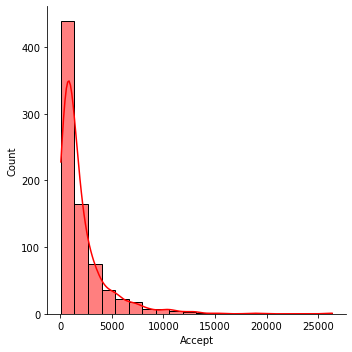

BoxPlot of Accept
----------------------------------------------------------------------------


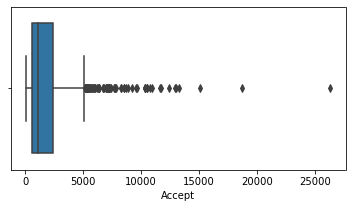

Description of Enroll
----------------------------------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64 Distribution of Enroll
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

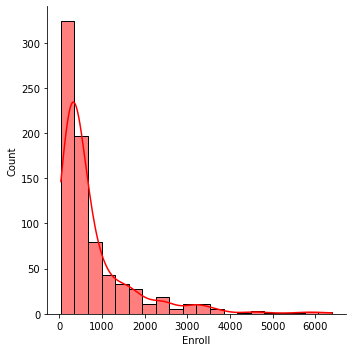

BoxPlot of Enroll
----------------------------------------------------------------------------


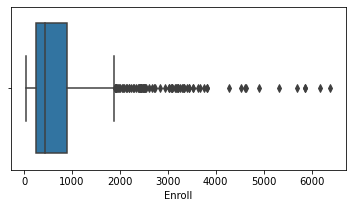

Description of Top10perc
----------------------------------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64 Distribution of Top10perc
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

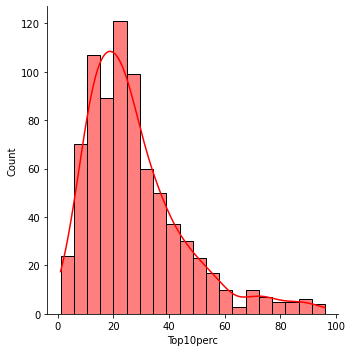

BoxPlot of Top10perc
----------------------------------------------------------------------------


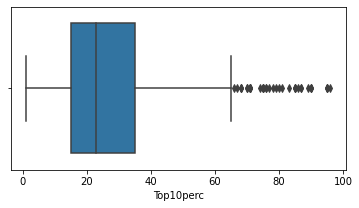

Description of Top25perc
----------------------------------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64 Distribution of Top25perc
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

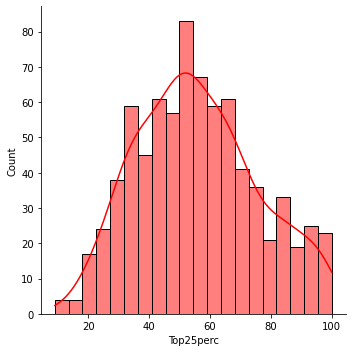

BoxPlot of Top25perc
----------------------------------------------------------------------------


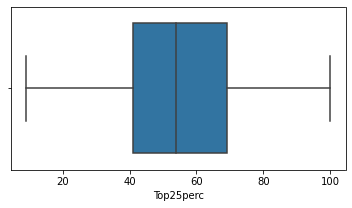

Description of F.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64 Distribution of F.Undergrad
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

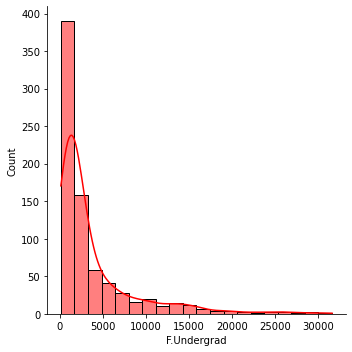

BoxPlot of F.Undergrad
----------------------------------------------------------------------------


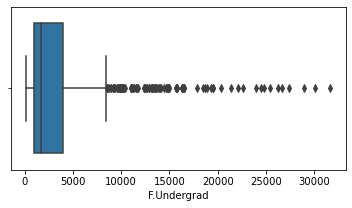

Description of P.Undergrad
----------------------------------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64 Distribution of P.Undergrad
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

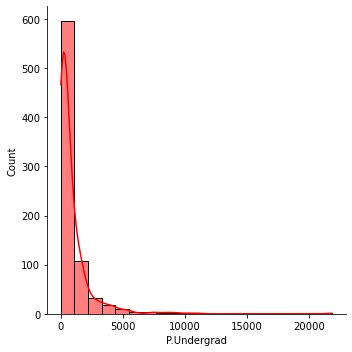

BoxPlot of P.Undergrad
----------------------------------------------------------------------------


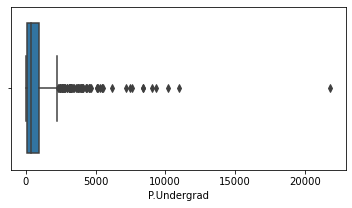

Description of Outstate
----------------------------------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64 Distribution of Outstate
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

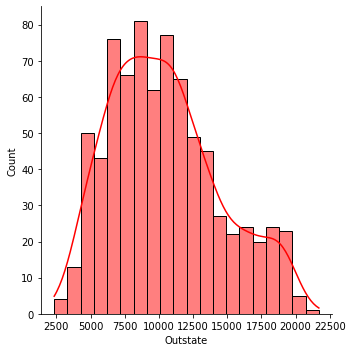

BoxPlot of Outstate
----------------------------------------------------------------------------


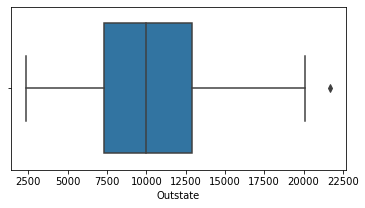

Description of Room.Board
----------------------------------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64 Distribution of Room.Board
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

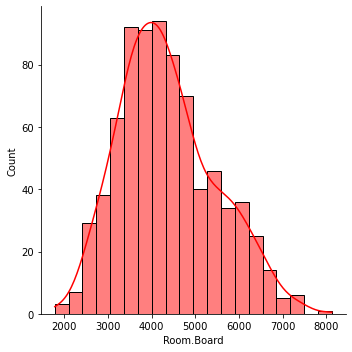

BoxPlot of Room.Board
----------------------------------------------------------------------------


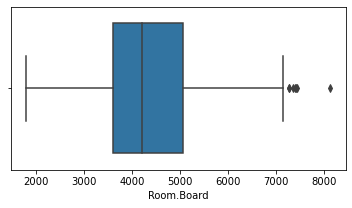

Description of Books
----------------------------------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64 Distribution of Books
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

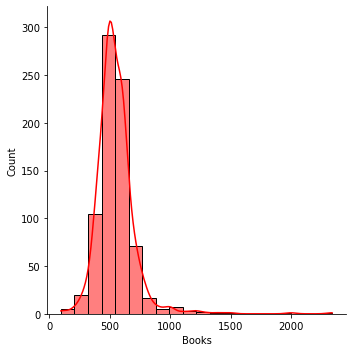

BoxPlot of Books
----------------------------------------------------------------------------


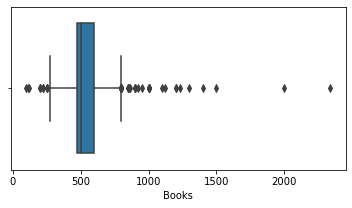

Description of Personal
----------------------------------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64 Distribution of Personal
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

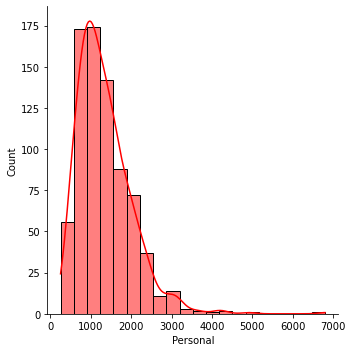

BoxPlot of Personal
----------------------------------------------------------------------------


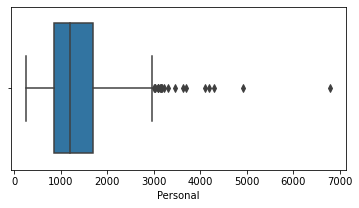

Description of PhD
----------------------------------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64 Distribution of PhD
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

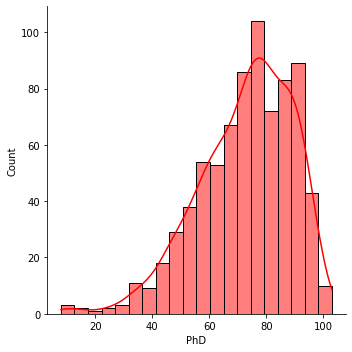

BoxPlot of PhD
----------------------------------------------------------------------------


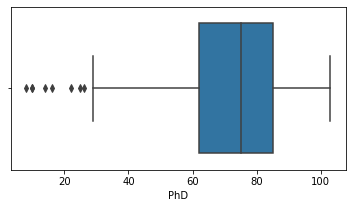

Description of Terminal
----------------------------------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64 Distribution of Terminal
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

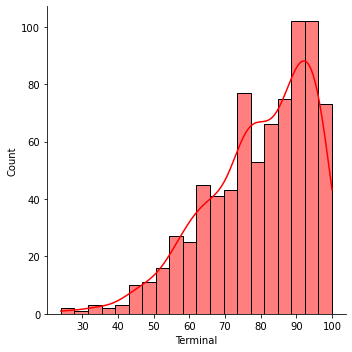

BoxPlot of Terminal
----------------------------------------------------------------------------


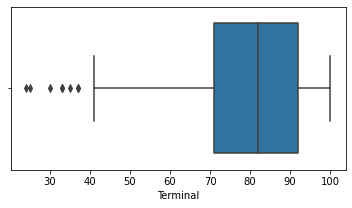

Description of S.F.Ratio
----------------------------------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64 Distribution of S.F.Ratio
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

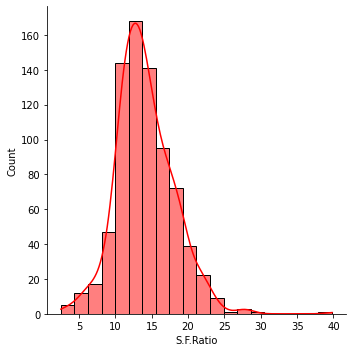

BoxPlot of S.F.Ratio
----------------------------------------------------------------------------


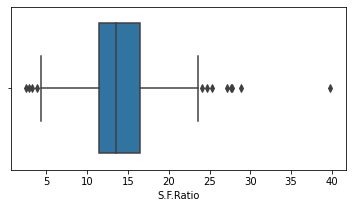

Description of perc.alumni
----------------------------------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64 Distribution of perc.alumni
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

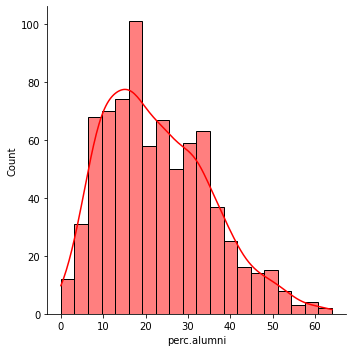

BoxPlot of perc.alumni
----------------------------------------------------------------------------


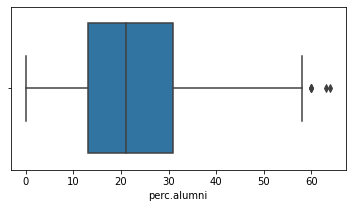

Description of Expend
----------------------------------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64 Distribution of Expend
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

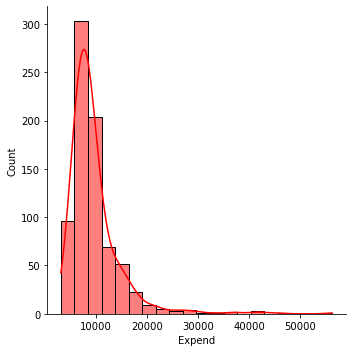

BoxPlot of Expend
----------------------------------------------------------------------------


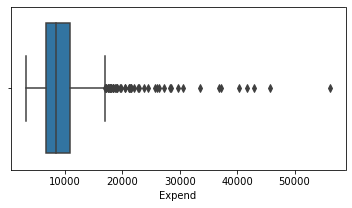

Description of Grad.Rate
----------------------------------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64 Distribution of Grad.Rate
----------------------------------------------------------------------------


<Figure size 864x360 with 0 Axes>

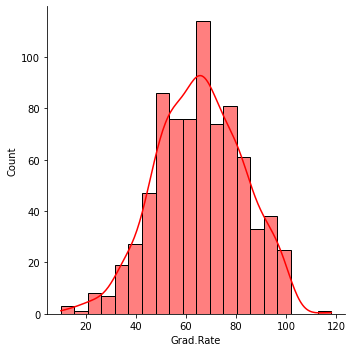

BoxPlot of Grad.Rate
----------------------------------------------------------------------------


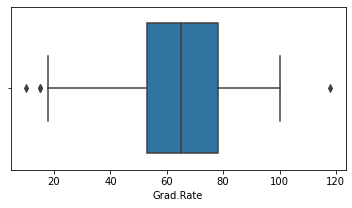

In [122]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

#### Bivariate Analysis

In [18]:
corr=df_num.corr(method='pearson')

NameError: name 'df_num' is not defined

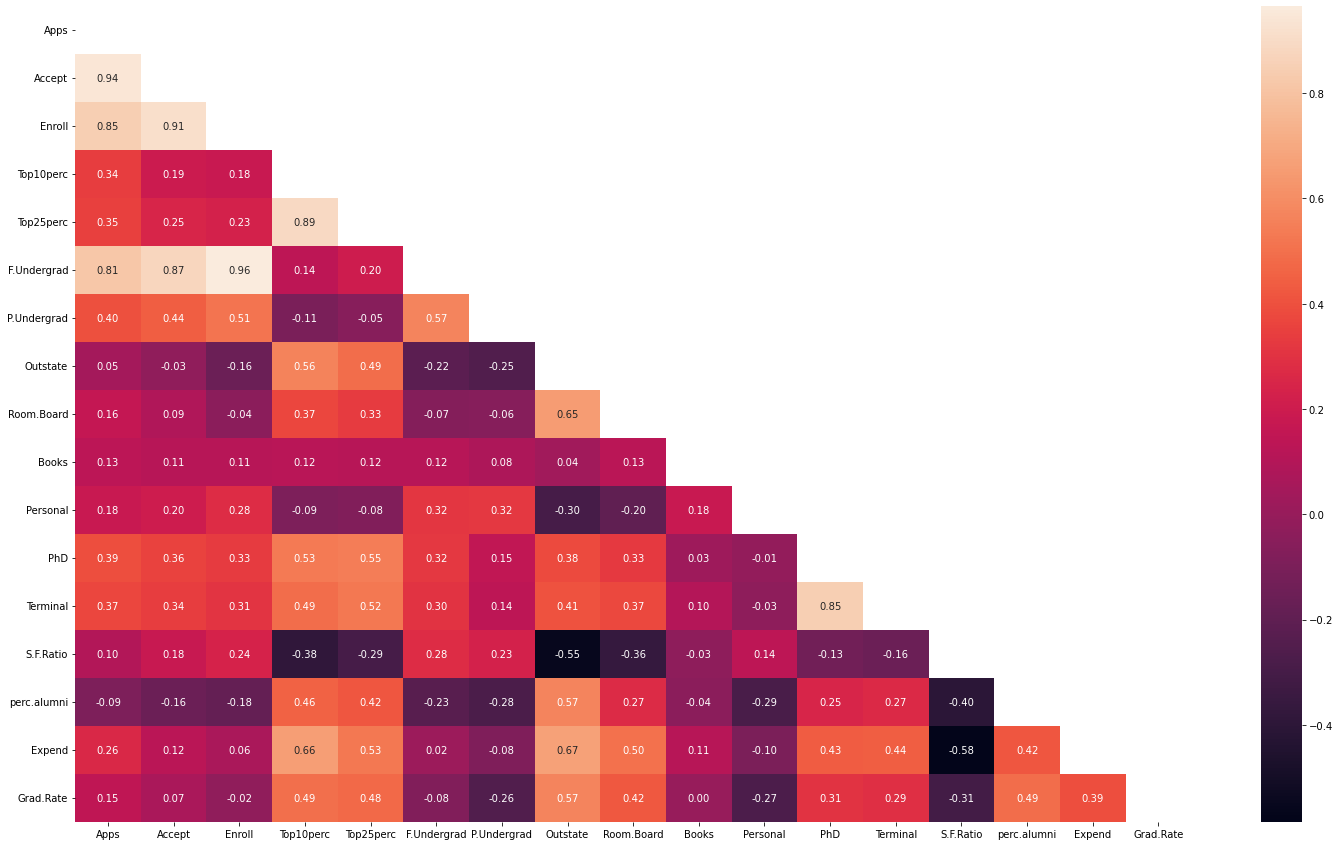

In [126]:
mask=np.triu(np.ones_like(corr,dtype=bool))
fig=plt.subplots(figsize=(25,15))
sns.heatmap(df_num.corr(),annot=True,fmt='.2f',mask=mask);

## 2.2 Is scaling necessary for PCA in this case? Give justification and perform scaling.

In [127]:
df_num.head(1)

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60


In [128]:
from scipy.stats import zscore

In [129]:
df_num_scaled=df_num.apply(zscore)
df_num_scaled.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,-0.346882,-0.321205,-0.063509,-0.258583,-0.191827,-0.168116,-0.209207,-0.746356,-0.964905,-0.602312,1.270045,-0.163028,-0.115729,1.013776,-0.867574,-0.501910,-0.318252
1,-0.210884,-0.038703,-0.288584,-0.655656,-1.353911,-0.209788,0.244307,0.457496,1.909208,1.215880,0.235515,-2.675646,-3.378176,-0.477704,-0.544572,0.166110,-0.551262
2,-0.406866,-0.376318,-0.478121,-0.315307,-0.292878,-0.549565,-0.497090,0.201305,-0.554317,-0.905344,-0.259582,-1.204845,-0.931341,-0.300749,0.585935,-0.177290,-0.667767
3,-0.668261,-0.681682,-0.692427,1.840231,1.677612,-0.658079,-0.520752,0.626633,0.996791,-0.602312,-0.688173,1.185206,1.175657,-1.615274,1.151188,1.792851,-0.376504
4,-0.726176,-0.764555,-0.780735,-0.655656,-0.596031,-0.711924,0.009005,-0.716508,-0.216723,1.518912,0.235515,0.204672,-0.523535,-0.553542,-1.675079,0.241803,-2.939613


## 2.3 Comment on the comparison between the covariance and the correlation matrices from this data.[on scaled data]

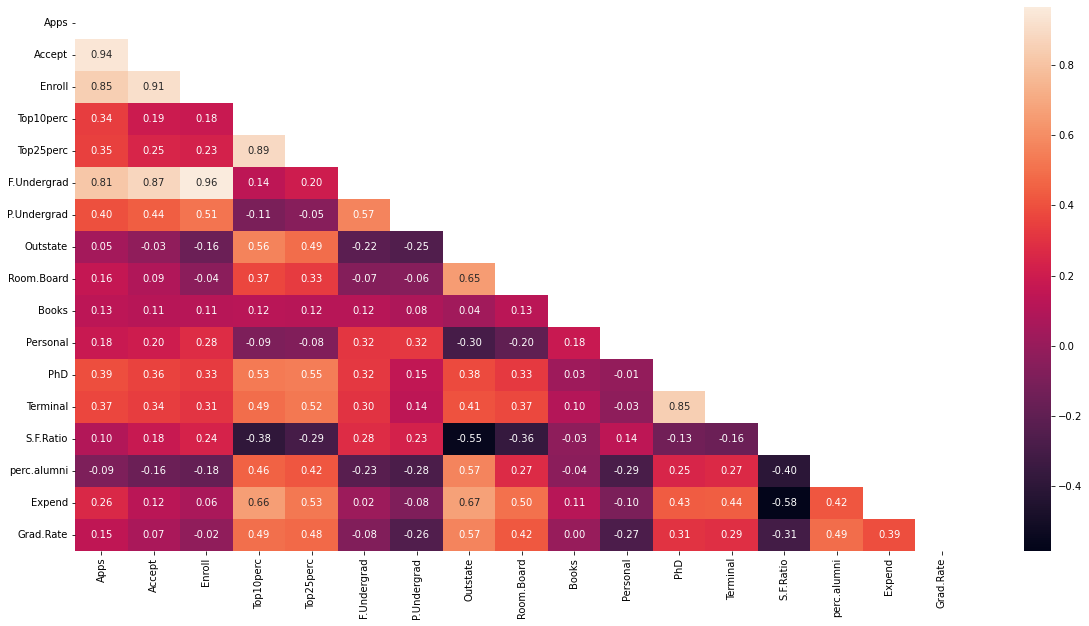

In [132]:
mask=np.triu(np.ones_like(corr,dtype=bool))
plt.subplots(figsize=(20,10))
0

## 2.4 Check the dataset for outliers before and after scaling. What insight do you derive here?

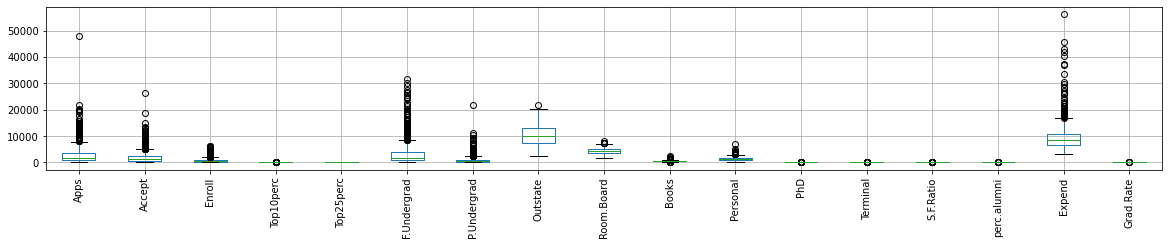

In [135]:
df_num.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

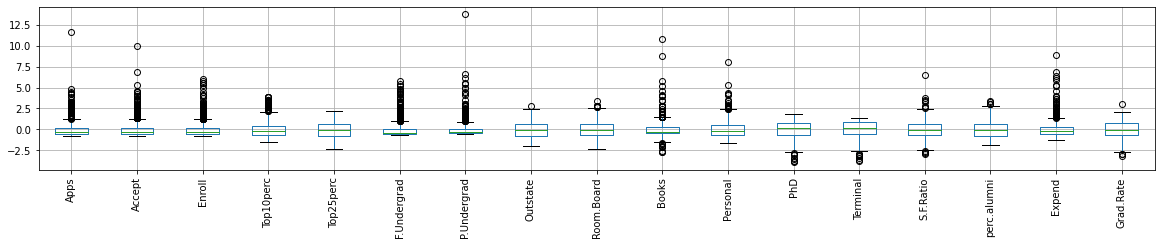

In [133]:
df_num_scaled.boxplot(figsize=(20,3))
plt.xticks(rotation=90)
plt.show()

## 2.5 Extract the eigenvalues and eigenvectors. [Using Sklearn PCA Print Both]

In [136]:
from sklearn.decomposition import PCA

In [170]:
pca=PCA(random_state=123)
df_pca=pca.fit_transform(df_num_scaled)
df_pca.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073537e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05641899e-04,  2.07356368e+00, -1.32891515e+00],
       ...,
       [ 1.75239502e-03,  1.03709803e-01, -2.25582869e-02, ...,
         6.79013123e-02,  3.53597440e-01, -1.14873492e-01],
       [-9.31400698e-02, -5.02556890e-02, -4.05268301e-03, ...,
        -2.32023970e-01,  3.04416200e-01, -1.17076127e-01],
       [ 9.35522023e-02, -1.74057054e-01,  3.75875882e-03, ...,
        -9.99380421e-02,  3.35104811e-01, -2.57218339e-03]])

## 2.6 Perform PCA and export the data of the Principal Component (eigenvectors) into a data frame with the original features

In [171]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [172]:
pca.components_.T

array([[ 2.48765602e-01,  3.31598227e-01, -6.30921033e-02,
         2.81310530e-01,  5.74140964e-03, -1.62374420e-02,
        -4.24863486e-02, -1.03090398e-01, -9.02270802e-02,
         5.25098025e-02,  4.30462074e-02,  2.40709086e-02,
         5.95830975e-01,  8.06328039e-02,  1.33405806e-01,
         4.59139498e-01,  3.58970400e-01],
       [ 2.07601502e-01,  3.72116750e-01, -1.01249056e-01,
         2.67817346e-01,  5.57860920e-02,  7.53468452e-03,
        -1.29497196e-02, -5.62709623e-02, -1.77864814e-01,
         4.11400844e-02, -5.84055850e-02, -1.45102446e-01,
         2.92642398e-01,  3.34674281e-02, -1.45497511e-01,
        -5.18568789e-01, -5.43427250e-01],
       [ 1.76303592e-01,  4.03724252e-01, -8.29855709e-02,
         1.61826771e-01, -5.56936353e-02, -4.25579803e-02,
        -2.76928937e-02,  5.86623552e-02, -1.28560713e-01,
         3.44879147e-02, -6.93988831e-02,  1.11431545e-02,
        -4.44638207e-01, -8.56967180e-02,  2.95896092e-02,
        -4.04318439e-01,  6.0

In [1]:
exp_var=pca.explained_variance_ratio_
pca.explained_variance_

NameError: name 'pca' is not defined

In [174]:
exp_var

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

In [175]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

In [176]:
df_extrated=pd.DataFrame(pca.components_.T,
                                 columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13',
                                         'PC14','PC15','PC16','PC17'],
                                 index=df_num_scaled.columns)

In [177]:
df_extrated.head().T

,Apps,Accept,Enroll,Top10perc,Top25perc
PC1,0.248766,0.207602,0.176304,0.354274,0.344001
PC2,0.331598,0.372117,0.403724,-0.082412,-0.044779
PC3,-0.063092,-0.101249,-0.082986,0.035056,-0.024148
PC4,0.281311,0.267817,0.161827,-0.051547,-0.109767
PC5,0.005741,0.055786,-0.055694,-0.395434,-0.426534
PC6,-0.016237,0.007535,-0.042558,-0.052693,0.033092
PC7,-0.042486,-0.012950,-0.027693,-0.161332,-0.118486
PC8,-0.103090,-0.056271,0.058662,-0.122678,-0.102492
PC9,-0.090227,-0.177865,-0.128561,0.341100,0.403712
PC10,0.052510,0.041140,0.034488,0.064026,0.014549


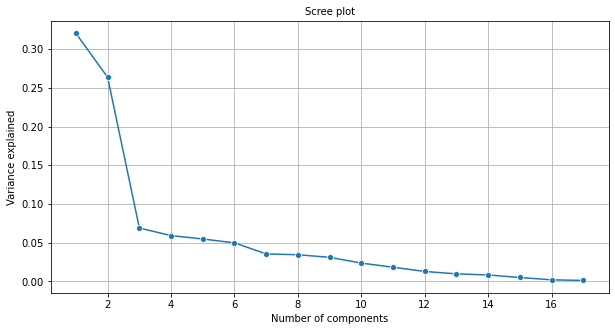

In [178]:
plt.figure(figsize=(10,5))
sns.lineplot(y=exp_var,x=range(1,len(exp_var)+1),marker='o')
plt.xlabel('Number of components',fontsize=10)
plt.ylabel('Variance explained',fontsize=10)
plt.title('Scree plot',fontsize=10)
plt.grid()
plt.show()

In [180]:
df_selected=df_extrated[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8']]

In [181]:
df_selected.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090
Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271
Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662
Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678
Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492


## 2.7 Write down the explicit form of the first PC (in terms of the eigenvectors. Use values with two places of decimals only). [hint: write the linear equation of PC in terms of eigenvectors and corresponding features]

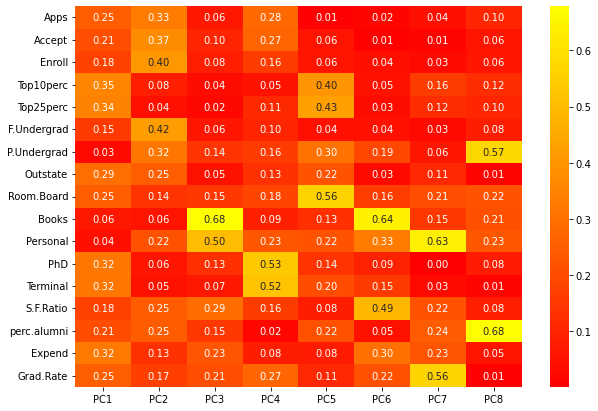

In [185]:
plt.figure(figsize=(10,7))
sns.heatmap(abs(df_selected),annot=True,cmap='autumn',fmt='.2f');

## 2.8 Consider the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate?

In [186]:
np.cumsum(pca.explained_variance_ratio_)

array([0.32020628, 0.58360843, 0.65261759, 0.71184748, 0.76673154,
       0.81657854, 0.85216726, 0.88670347, 0.91787581, 0.94162773,
       0.96004199, 0.9730024 , 0.98285994, 0.99131837, 0.99648962,
       0.99864716, 1.        ])

## 2.9 Explain the business implication of using the Principal Component Analysis for this case study. How may PCs help in the further analysis? [Hint: Write Interpretations of the Principal Components Obtained]